In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
data = pd.read_csv('./steam game/steam.csv')
steam = data

In [66]:
print(steam.shape)
steam.info()

(27075, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-

In [67]:
steam.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [68]:
steam['release_date'].head()

0    2000-11-01
1    1999-04-01
2    2003-05-01
3    2001-06-01
4    1999-11-01
Name: release_date, dtype: object

In [69]:
print(steam['release_date'].iloc[0].split('-'))

['2000', '11', '01']


In [70]:
year = []
month = []

In [71]:
for i in steam['release_date']:
    y, m, d = i.split('-')
    year.append(int(y))
    month.append(int(m))

In [72]:
steam['year'] = np.array(year)
steam['month'] = np.array(month)

In [73]:
steam_year = steam.groupby('year')['year'].count()

In [74]:
steam_year.head()

year
1997    1
1998    1
1999    2
2000    2
2001    4
Name: year, dtype: int64

In [75]:
print(steam_year[-10:])

year
2010     238
2011     239
2012     320
2013     418
2014    1555
2015    2597
2016    4361
2017    6357
2018    8160
2019    2213
Name: year, dtype: int64


In [80]:
steam_year = steam_year[-10:-1]

In [81]:
x = [i for i in steam_year.index]
print(x)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [134]:
font1 = {'family': 'D2Coding-Ver1.3.2-20180524',
         'size': 16
         }

In [135]:
font2 = {'family': 'D2Coding-Ver1.3.2-20180524',
         'size': 20
         }

In [325]:
font3 = {'family': 'D2Coding-Ver1.3.2-20180524',
         'size': 30
         }

1. 연도 별 발매량(2010-2018) - 막대그래프

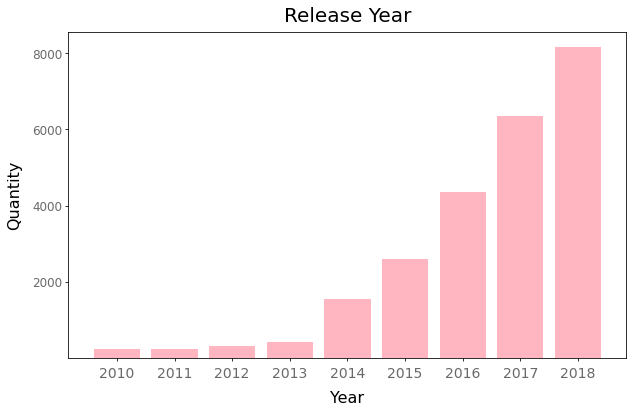

In [376]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')

ax.bar(x, steam_year, color="lightpink")
ax.set_title('Release Year', fontdict=font2, pad=10) # 발매연도
ax.set_xlabel('Year', labelpad=10, fontdict=font1) # 연도
ax.set_ylabel('Quantity', labelpad=10, fontdict=font1) # 발매량
ax.set_xticks(x)
ax.set_yticks([i * 2000 for i in range(1, 5)])
ax.tick_params(axis='x', length=3, pad=6, labelsize=14, labelcolor='dimgrey')
ax.tick_params(axis='y', length=3, pad=3, labelsize=12, labelcolor='dimgrey')

plt.savefig("Release Year.png")

2. 연도 별 발매량(2010-2018) - 꺽은선 그래프

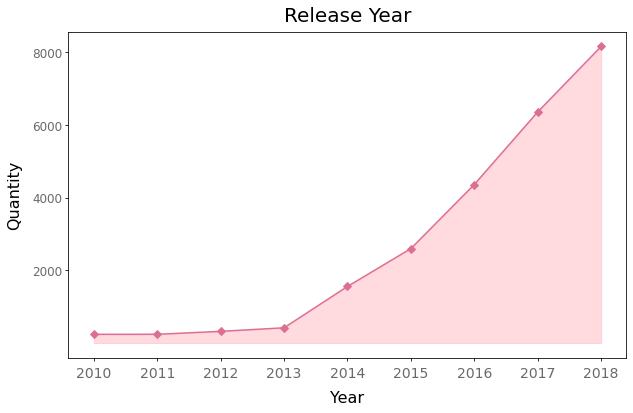

In [374]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('white')

ax.plot(x, steam_year, color="palevioletred", marker='D')
ax.set_title('Release Year', fontdict=font2, pad=10) # 발매연도
ax.set_xlabel('Year', labelpad=10, fontdict=font1) # 연도
ax.set_ylabel('Quantity', labelpad=10, fontdict=font1) # 발매량
ax.set_xticks(x)
ax.set_yticks([i * 2000 for i in range(1, 5)])
ax.tick_params(axis='x', length=3, pad=6, labelsize=14, labelcolor='dimgrey')
ax.tick_params(axis='y', length=3, pad=3, labelsize=12, labelcolor='dimgrey')
ax.fill_between(x, steam_year, color='lightpink', alpha=0.5)

plt.savefig("Release Year(1).png")

In [179]:
genres_set = set()
for i in steam.genres.str.split(';'):
    genres_set.update(i)
genres_set

{'Accounting',
 'Action',
 'Adventure',
 'Animation & Modeling',
 'Audio Production',
 'Casual',
 'Design & Illustration',
 'Documentary',
 'Early Access',
 'Education',
 'Free to Play',
 'Game Development',
 'Gore',
 'Indie',
 'Massively Multiplayer',
 'Nudity',
 'Photo Editing',
 'RPG',
 'Racing',
 'Sexual Content',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Tutorial',
 'Utilities',
 'Video Production',
 'Violent',
 'Web Publishing'}

In [181]:
d = dict()
genre_sets = steam.genres.str.split(';').apply(set)
for genre in genres_set:
    d[genre] = genre_sets.apply(lambda row: genre in row)
steam = steam.assign(**d)

In [230]:
genres_count = steam[genres_set].sum()
genres_count = genres_count.sort_values()[-20:]
print(len(genres_count))

20


C:\Users\dohee\AppData\Local\Temp\ipykernel_14212\2656532751.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  genres_count = steam[genres_set].sum()


In [231]:
genres_percentage = [round(i / len(steam) * 100, 2) for i in genres_count]

3. 최다 장르 TOP 20

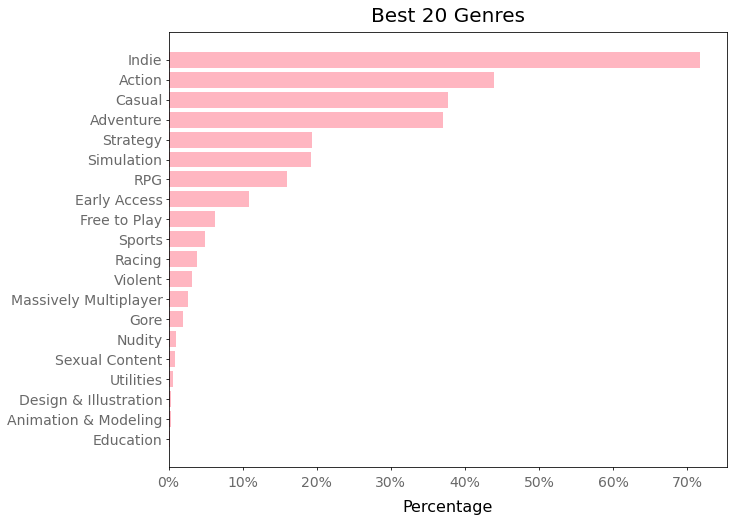

In [373]:
fig, ax = plt.subplots(figsize=(10, 8))
fig.set_facecolor('white')

ax.barh(genres_count.index, genres_percentage, color='lightpink')
ax.set_title('Best 20 Genres', fontdict=font2, pad=10) # 장르
ax.set_xlabel('Percentage', labelpad=10, fontdict=font1) # 비율
ax.set_xticks([i* 10 for i in range(8)])
ax.set_xticklabels(['{0}%'.format(i * 10) for i in range(8)])
ax.tick_params(axis='x', length=3, pad=6, labelsize=14, labelcolor='dimgrey')
ax.tick_params(axis='y', length=3, pad=3, labelsize=14, labelcolor='dimgrey')

plt.savefig("Best 20 Genres.png")

In [313]:
steam_average_playtime = steam.groupby('average_playtime')['average_playtime'].count()
steam_average_playtime.head()

average_playtime
0    20905
1      156
2       58
3       73
4       42
Name: average_playtime, dtype: int64

4. 게임 플레이 비율 - 전체

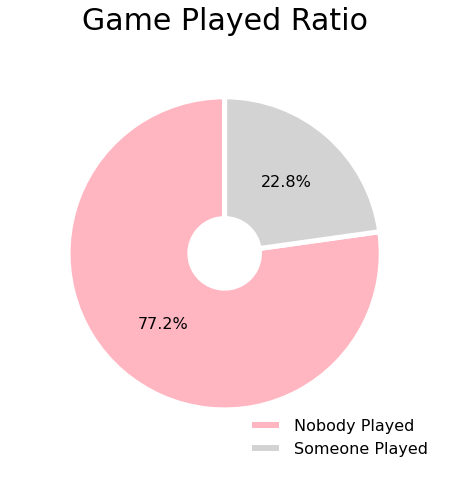

In [372]:
fig, ax = plt.subplots(figsize=(8, 8))
fig.set_facecolor('white')

ratio = [steam_average_playtime[0], len(steam) - steam_average_playtime[0]]
labels = ['Nobody Played', 'Someone Played']
color = ['lightpink', 'lightgrey']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

ax.pie(ratio, autopct='%.1f%%', startangle=90, wedgeprops=wedgeprops, colors=color, textprops=font1, radius=0.9)
ax.set_title('Game Played Ratio', fontdict=font3) # 게임 플레이 여부 비율
ax.legend(labels, fontsize=16, loc='lower right', frameon=False)

plt.savefig("Game Played Ratio.png")

In [364]:
steam_indie = steam[steam['genres'].str.contains('Indie')]
steam_indie_average_playtime = steam_indie.groupby('average_playtime')['average_playtime'].count()
steam_indie_average_playtime.head()

average_playtime
0    15376
1       97
2       37
3       43
4       29
Name: average_playtime, dtype: int64

5. 게임 플레이 비율 - 인디 게임

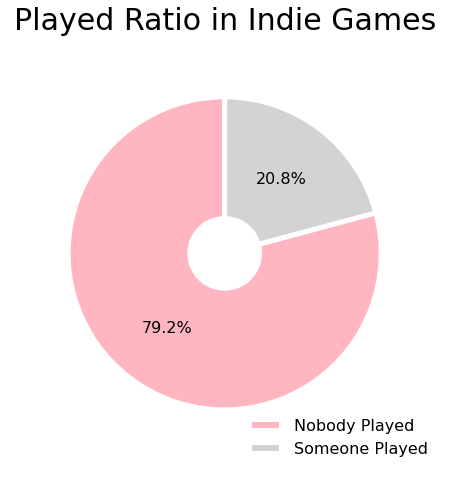

In [379]:
fig, ax = plt.subplots(figsize=(8, 8))
fig.set_facecolor('white')

ratio = [steam_indie_average_playtime[0], len(steam_indie) - steam_indie_average_playtime[0]]
labels = ['Nobody Played', 'Someone Played']
color = ['lightpink', 'lightgrey']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

ax.pie(ratio, autopct='%.1f%%', startangle=90, wedgeprops=wedgeprops, colors=color, textprops=font1, radius=0.9)
ax.set_title('Played Ratio in Indie Games', fontdict=font3) # 인디 게임 플레이 여부 비율
ax.legend(labels, fontsize=16, loc='lower right', frameon=False)

plt.savefig("Indie Game Played Ratio.png")